## InBody Graph

#### WT: 체중 kg
#### SMM: 골격근량 kg
#### BFM: 체지방  kg
#### PFM: 체지방률 %

In [1]:
import sys
import ssl
from urllib.request import Request, urlopen
from datetime import datetime
from functools import reduce


try:
    ssl._create_default_https_context = ssl._create_unverified_context

    resfetch = list(filter(
        lambda s: s.startswith('#'),
        reduce(
            lambda param, func: func(param),
            [lambda raw: [] if raw is None else raw.split('\n'), lambda strs: [f(s) for f in [str.strip] for s in strs]],
            urlopen(Request('https://raw.githubusercontent.com/kickscar/HELLCHANG-PRACTICES/main/datasets/inbody.md')).read().decode('utf-8', errors='replace')
        )
    ))
except Exception as err:
    (lambda e: print(f'{e} : {datetime.now()}', file=sys.stderr))(err)

len(resfetch) == 0 and sys.exit(0)

print(resfetch)

['## 2021.07.01', '#### WT : 60.1(kg)', '#### SMM: 28.4(kg)', '#### BFM:  9.1(kg)', '#### PBF: 15.2(%)', '## 2021.09.24', '#### WT : 60.2(kg)', '#### SMM: 29.3(kg)', '#### BFM:  7.9(kg)', '#### PBF: 13.2(%)', '## 2021.10.14', '#### WT : 60.8(kg)', '#### SMM: 29.9(kg)', '#### BFM:  7.3(kg)', '#### PBF: 12.1(%)', '## 2021.12.23', '#### WT : 63.4(kg)', '#### SMM: 30.3(kg)', '#### BFM:  9.3(kg)', '#### PBF: 14.7(%)', '## 2022.05.30', '#### WT : 63.7(kg)', '#### SMM: 30.8(kg)', '#### BFM:  8.6(kg)', '#### PBF: 13.5(%)', '## 2022.07.13', '#### WT : 63.6(kg)', '#### SMM: 31.2(kg)', '#### BFM:  8.1(kg)', '#### PBF: 12.8(%)', '## 2022.07.20', '#### WT : 64.7(kg)', '#### SMM: 31.9(kg)', '#### BFM:  8.1(kg)', '#### PBF: 12.5(%)', '## 2022.08.26', '#### WT : 63.5(kg)', '#### SMM: 30.9(kg)', '#### BFM:  8.5(kg)', '#### PBF: 13.4(%)']


In [2]:
import re


resarrange = []
for res in resfetch:
    if res.startswith('####'):
        item, val = (s.strip() for s in res.replace('####', '').strip().split(':'))
        sval, unit = re.compile(r'(\d+.\d*)\s*(.*)').match(re.sub(r"[\([{})\]\s]", "", val)).groups()
        resarrange.append((date, item, float(sval), unit))
    elif res.startswith('##'):
        date = res.replace('##', '').strip()

print(resarrange)

[('2021.07.01', 'WT', 60.1, 'kg'), ('2021.07.01', 'SMM', 28.4, 'kg'), ('2021.07.01', 'BFM', 9.1, 'kg'), ('2021.07.01', 'PBF', 15.2, '%'), ('2021.09.24', 'WT', 60.2, 'kg'), ('2021.09.24', 'SMM', 29.3, 'kg'), ('2021.09.24', 'BFM', 7.9, 'kg'), ('2021.09.24', 'PBF', 13.2, '%'), ('2021.10.14', 'WT', 60.8, 'kg'), ('2021.10.14', 'SMM', 29.9, 'kg'), ('2021.10.14', 'BFM', 7.3, 'kg'), ('2021.10.14', 'PBF', 12.1, '%'), ('2021.12.23', 'WT', 63.4, 'kg'), ('2021.12.23', 'SMM', 30.3, 'kg'), ('2021.12.23', 'BFM', 9.3, 'kg'), ('2021.12.23', 'PBF', 14.7, '%'), ('2022.05.30', 'WT', 63.7, 'kg'), ('2022.05.30', 'SMM', 30.8, 'kg'), ('2022.05.30', 'BFM', 8.6, 'kg'), ('2022.05.30', 'PBF', 13.5, '%'), ('2022.07.13', 'WT', 63.6, 'kg'), ('2022.07.13', 'SMM', 31.2, 'kg'), ('2022.07.13', 'BFM', 8.1, 'kg'), ('2022.07.13', 'PBF', 12.8, '%'), ('2022.07.20', 'WT', 64.7, 'kg'), ('2022.07.20', 'SMM', 31.9, 'kg'), ('2022.07.20', 'BFM', 8.1, 'kg'), ('2022.07.20', 'PBF', 12.5, '%'), ('2022.08.26', 'WT', 63.5, 'kg'), ('2022

In [3]:
from datetime import datetime


dataset_x, dataset_y, d, key = [], {}, '', ''
for result in resarrange:
    if d != result[0]:
        d = result[0]
        dataset_x.append(datetime.strptime(d, '%Y.%m.%d'))

    if key != result[1]:
        key = result[1]
        if key not in dataset_y:
            dataset_y.update({key: {'unit': result[3], 'values': []}})
        dataset_y[key]['values'].append(result[2])

print(dataset_x)
print(dataset_y)

[datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 9, 24, 0, 0), datetime.datetime(2021, 10, 14, 0, 0), datetime.datetime(2021, 12, 23, 0, 0), datetime.datetime(2022, 5, 30, 0, 0), datetime.datetime(2022, 7, 13, 0, 0), datetime.datetime(2022, 7, 20, 0, 0), datetime.datetime(2022, 8, 26, 0, 0)]
{'WT': {'unit': 'kg', 'values': [60.1, 60.2, 60.8, 63.4, 63.7, 63.6, 64.7, 63.5]}, 'SMM': {'unit': 'kg', 'values': [28.4, 29.3, 29.9, 30.3, 30.8, 31.2, 31.9, 30.9]}, 'BFM': {'unit': 'kg', 'values': [9.1, 7.9, 7.3, 9.3, 8.6, 8.1, 8.1, 8.5]}, 'PBF': {'unit': '%', 'values': [15.2, 13.2, 12.1, 14.7, 13.5, 12.8, 12.5, 13.4]}}


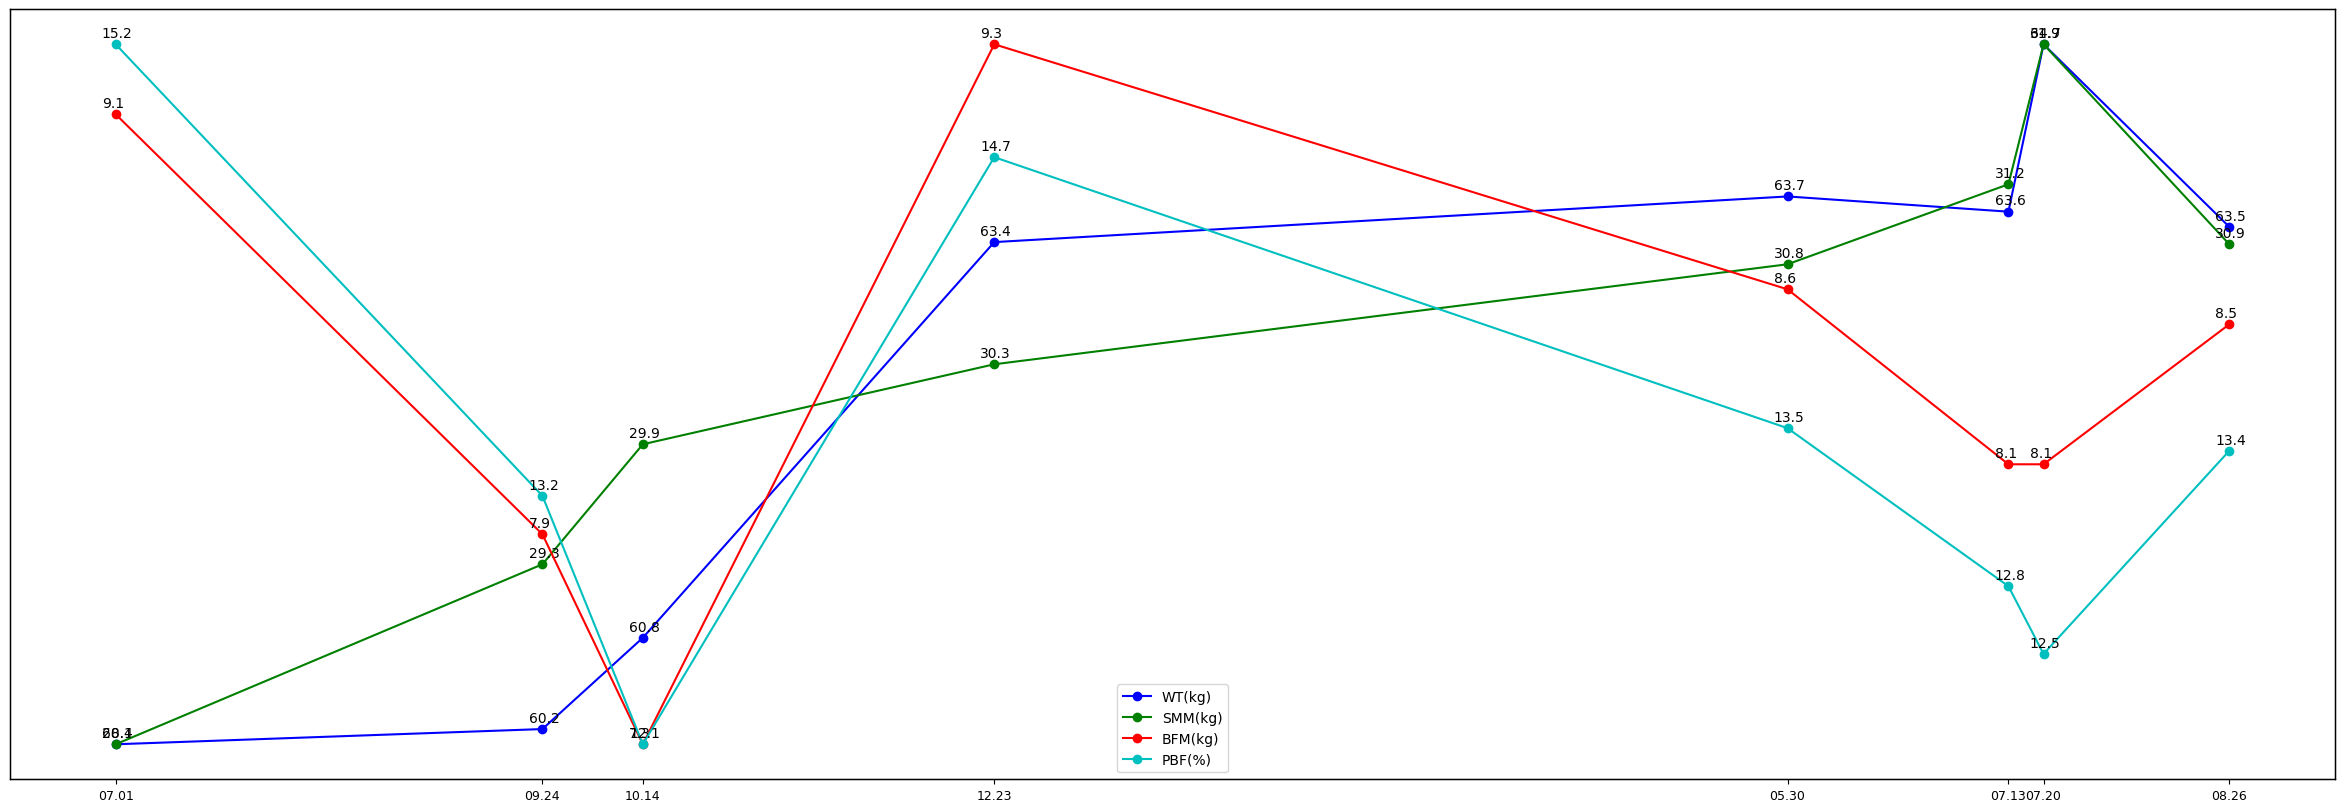

In [4]:
from itertools import cycle
from matplotlib import pyplot as plt


dataset_x_days = [(x - dataset_x[0]).days for x in dataset_x]
dataset_x_fdates = [x.strftime('%m.%d') for x in dataset_x]

legendhandles = []
cycol = cycle('bgrcmk')

fig = plt.figure(figsize=(30, 10))
spec = plt.GridSpec(1, 1)
subplot = fig.add_subplot(spec[0, 0])

subplot.set_yticks([])
subplot.set_xticks(dataset_x_days)
subplot.set_xticklabels(dataset_x_fdates, fontsize=9)

for key in dataset_y.keys():
    tx = subplot.twinx()

    tx.set_yticks([])
    line, = tx.plot(dataset_x_days, dataset_y[key]['values'], 'o-', color=next(cycol), label=f"{key}({dataset_y[key]['unit']})")

    for idx, yv in enumerate(dataset_y[key]['values']):
        tx.annotate(str(yv), xy=(dataset_x_days[idx], yv), xytext=(-10, 5), textcoords='offset points')

    legendhandles.append(line)

plt.legend(handles=legendhandles, loc='lower center')
plt.show()